In [120]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import scipy.stats as stats
import statsmodels.api as sm

### Read the data

In [16]:
data = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\DATA_INCUBATOR\music_data.csv')

In [17]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop_duplicates()

In [18]:
data.head()

,artist,title,key,mode,tempo,time_sign,speechiness,valence,liveness,danceability,loudness,duration,year
0,KC & The Sunshine Band,Please Don't Go,F#,major,96.307,4,0.0398,0.437,0.482,0.482,-11.093,230533,1980
1,Rupert Holmes,Escape (The Pina Colada Song),C,major,138.791,4,0.0597,0.944,0.834,0.834,-13.653,276493,1980
2,Michael Jackson,Rock with You - Single Version,C#,major,114.031,4,0.0353,0.848,0.808,0.808,-12.521,220627,1980
3,Captain & Tennille,Do That To Me One More Time,G,major,90.223,4,0.0257,0.495,0.728,0.728,-8.223,256667,1980
4,Queen,Crazy Little Thing Called Love,D,major,76.709,4,0.0516,0.718,0.622,0.622,-6.756,163373,1980


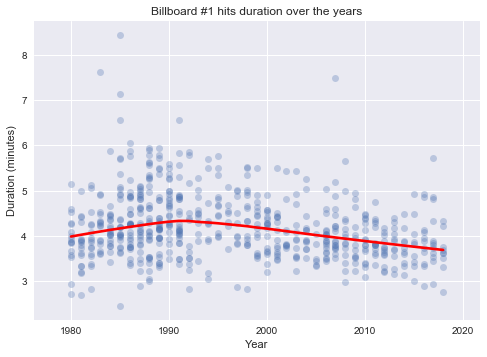

In [133]:
sns.regplot(data.year, data.duration/1000/60, scatter_kws={'alpha':0.3}, \
            line_kws={'color':'red'}, lowess=True)
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.title('Billboard #1 hits duration over the years')
plt.show()

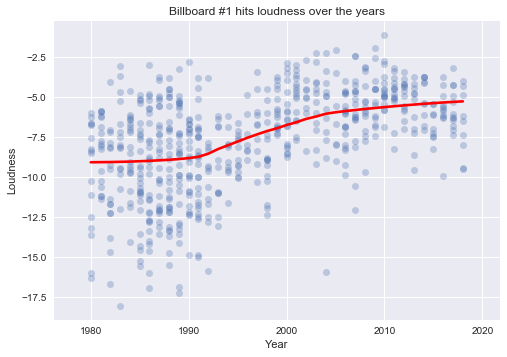

In [136]:
sns.regplot(data.year, data.loudness, scatter_kws={'alpha':0.3}, \
            line_kws={'color':'red'}, lowess=True)
plt.xlabel('Year')
plt.ylabel('Loudness')
plt.title('Billboard #1 hits loudness over the years')
plt.show()

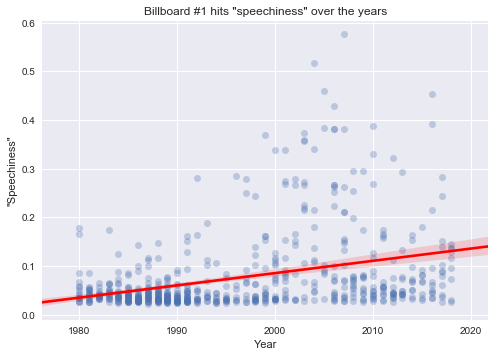

In [138]:
sns.regplot(data.year, data.speechiness, scatter_kws={'alpha':0.3}, \
            line_kws={'color':'red'})
plt.xlabel('Year')
plt.ylabel('"Speechiness"')
plt.title('Billboard #1 hits "speechiness" over the years')
plt.show()

In [77]:
data = sm.add_constant(data)

In [139]:
reg = sm.formula.ols('year ~ duration + speechiness + loudness', data=data)
model = reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     96.93
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           2.08e-51
Time:                        17:58:38   Log-Likelihood:                -2251.2
No. Observations:                 621   AIC:                             4510.
Df Residuals:                     617   BIC:                             4528.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2013.6699      2.354    855.270      0.000    2009.046    2018.294
duration    -3.109e-05    8.6e-06     -3.615      0.000    -4.8e-05   -1.42e-05
speechiness    29.7026      4.670      6.360      0.000      20.532      38.873
loudness        1.5316      0.123     12.450      0.000       1.290       1.773
==============================================================================
Omnibus:                       11.699   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.159
Skew:                           0.081   Prob(JB):                       0.0279
Kurtosis:                       2.500   Cond. No.                     3.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
popular_keys = data.groupby('year')['key'].value_counts()

In [101]:
for i in range(1980,2019):
    print(f'Year: {i}\nKey: {popular_keys.loc[i].index[0]}')

Year: 1980
Key: D
Year: 1981
Key: A
Year: 1982
Key: E
Year: 1983
Key: B
Year: 1984
Key: C
Year: 1985
Key: A
Year: 1986
Key: A
Year: 1987
Key: B
Year: 1988
Key: C
Year: 1989
Key: G
Year: 1990
Key: C#
Year: 1991
Key: C#
Year: 1992
Key: E
Year: 1993
Key: D
Year: 1994
Key: B
Year: 1995
Key: G#
Year: 1996
Key: C#
Year: 1997
Key: A
Year: 1998
Key: C#
Year: 1999
Key: C#
Year: 2000
Key: C
Year: 2001
Key: F#
Year: 2002
Key: A#
Year: 2003
Key: C#
Year: 2004
Key: C#
Year: 2005
Key: G
Year: 2006
Key: G
Year: 2007
Key: C#
Year: 2008
Key: B
Year: 2009
Key: A
Year: 2010
Key: A#
Year: 2011
Key: C#
Year: 2012
Key: C
Year: 2013
Key: G
Year: 2014
Key: A
Year: 2015
Key: F
Year: 2016
Key: C
Year: 2017
Key: C#
Year: 2018
Key: G#


In [102]:
key_movements = [7, 7, 7, 1, 9, 0, 2, 1, 7, 6, 0, 3, 10, 9, 9, 5, 8, 4, 0, 11, 6, 4, 3, 0, 6,\
                0, 6, 10, 10, 1, 4, 11, 7, 10, 9, 5, 1, 5]

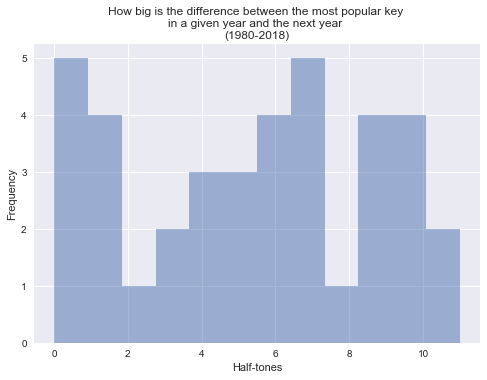

In [119]:
plt.hist(key_movements, bins=12, alpha=.5)
plt.title('How big is the difference between the most popular key \nin a given year and the next year \n(1980-2018)')
plt.xlabel('Half-tones')
plt.ylabel('Frequency')
plt.show()